In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random
import sys
import seaborn as sns
from matplotlib.image import imread
import cv2

In [2]:
test_path='test'
train_path='train'
#val_path='val'

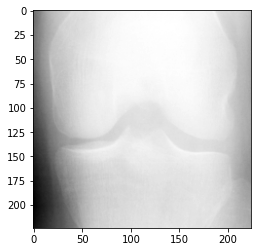

In [3]:
img=imread(train_path+'/0/'+os.listdir(train_path+'/0')[2])
plt.imshow(img,cmap='gray')
image=cv2.imread(train_path+'/0/'+os.listdir(train_path+'/0')[2])

In [4]:
image.shape

(224, 224, 3)

In [5]:
len(os.listdir(train_path))

3

In [6]:
len(os.listdir(train_path))

3

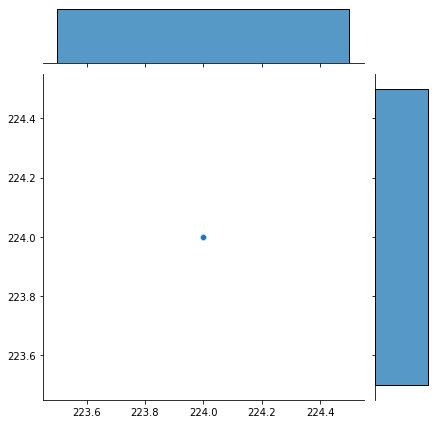

In [7]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/0'):
    img = imread(train_path+'/0'+'/'+image_filename)
    d1,d2 = img.shape
    dim1.append(d1)
    dim2.append(d2)
sns.jointplot(x=dim1,y=dim2)

In [8]:
image_shape = [224,224]

In [9]:
classes=['healthy','moderate','severe']
print(classes)

['healthy', 'moderate', 'severe']


In [10]:
data=0
total=0
for i in range(3):
    for image_filename in os.listdir(train_path+'/'+str(i)):
        total+=1
        data+=1       
        if i>5:
            break
    
    print("Total number of images = ",data, "in class =",i)
    data=0

print("Total images = ",total)
print("Average no images = ",total//3)

Total number of images =  2286 in class = 0
Total number of images =  757 in class = 1
Total number of images =  173 in class = 2
Total images =  3216
Average no images =  1072


In [11]:
data=0
total=0
for i in range(3):
    for image_filename in os.listdir(test_path+'/'+str(i)):
        total+=1
        data+=1       
        if i>5:
            break
    
    print("Total number of images = ",data, "in class =",i)
    data=0

print("Total images = ",total)
print("Average no images = ",total//3)

Total number of images =  639 in class = 0
Total number of images =  223 in class = 1
Total number of images =  51 in class = 2
Total images =  913
Average no images =  304


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [13]:
image_gen = ImageDataGenerator(rotation_range=40, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

batch_size = 512

In [14]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape,
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               #save_to_dir='preview',
                                               #save_prefix='train',
                                               #save_format='png',
                                               shuffle=True)

len(train_image_gen.classes)

Found 3216 images belonging to 3 classes.


3216

In [15]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape,
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               #save_to_dir='preview',
                                               #save_prefix='test',
                                               #save_format='png',
                                               shuffle=False)

len(test_image_gen.classes)

Found 913 images belonging to 3 classes.


913

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from keras import Sequential
from tensorflow.keras import regularizers
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from tensorflow.keras.applications.resnet_v2 import ResNet152V2, preprocess_input
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
import tensorflow as tf

VGG16 Model implementation and training

In [17]:
"""
#VGG16 Model
base_model=VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=image_shape+[3]
)

for layer in base_model.layers:
    layer.trainable = False

VGG16_model=Sequential()
VGG16_model.add(base_model)
VGG16_model.add(Flatten())
VGG16_model.add(Dense(800,activation=('relu')))
VGG16_model.add(Dense(650,activation=('relu')))
VGG16_model.add(Dropout(0.3))
VGG16_model.add(Dense(500,activation=('relu')))
VGG16_model.add(Dense(350,activation=('relu')))
VGG16_model.add(Dense(200,activation=('relu')))
VGG16_model.add(Dense(110,activation=('relu')))
VGG16_model.add(Dropout(0.4))
VGG16_model.add(Dense(98,activation=('relu')))
VGG16_model.add(Dense(40,activation=('relu')))
VGG16_model.add(Dense(len(classes),activation=('softmax')))

VGG16_model.summary()

"""

"\n#VGG16 Model\nbase_model=VGG16(\n    include_top=False,\n    weights='imagenet',\n    input_shape=image_shape+[3]\n)\n\nfor layer in base_model.layers:\n    layer.trainable = False\n\nVGG16_model=Sequential()\nVGG16_model.add(base_model)\nVGG16_model.add(Flatten())\nVGG16_model.add(Dense(800,activation=('relu')))\nVGG16_model.add(Dense(650,activation=('relu')))\nVGG16_model.add(Dropout(0.3))\nVGG16_model.add(Dense(500,activation=('relu')))\nVGG16_model.add(Dense(350,activation=('relu')))\nVGG16_model.add(Dense(200,activation=('relu')))\nVGG16_model.add(Dense(110,activation=('relu')))\nVGG16_model.add(Dropout(0.4))\nVGG16_model.add(Dense(98,activation=('relu')))\nVGG16_model.add(Dense(40,activation=('relu')))\nVGG16_model.add(Dense(len(classes),activation=('softmax')))\n\nVGG16_model.summary()\n\n"

In [18]:
"""
VGG16_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              """

"\nVGG16_model.compile(loss='categorical_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\n              "

In [19]:
"""
results = VGG16_model.fit(train_image_gen,epochs=5,
                    batch_size=batch_size,
                    validation_data=test_image_gen )
"""

'\nresults = VGG16_model.fit(train_image_gen,epochs=5,\n                    batch_size=batch_size,\n                    validation_data=test_image_gen )\n'

Custom built Model implementation and training

In [20]:
"""
#Custom built CNN model
custom_model=Sequential([layers.Input(shape=image_shape+[3]),
                  Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'),
                  MaxPool2D(pool_size=(2,2)),
                  Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'),
                  MaxPool2D(pool_size=(2,2)),
                  layers.Flatten(),
                  Dense(8,activation='relu'),
                  Dense(len(classes),activation='softmax')
                  ])

custom_model.summary()
"""

"\n#Custom built CNN model\ncustom_model=Sequential([layers.Input(shape=image_shape+[3]),\n                  Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'),\n                  MaxPool2D(pool_size=(2,2)),\n                  Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'),\n                  MaxPool2D(pool_size=(2,2)),\n                  layers.Flatten(),\n                  Dense(8,activation='relu'),\n                  Dense(len(classes),activation='softmax')\n                  ])\n\ncustom_model.summary()\n"

In [21]:
"""
custom_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
"""

"\ncustom_model.compile(loss='categorical_crossentropy',\n              optimizer='adam',\n              metrics=['accuracy'])\n"

In [22]:
"""
results = custom_model.fit(train_image_gen,epochs=5,
                    batch_size=batch_size,
                    validation_data=test_image_gen )
"""

'\nresults = custom_model.fit(train_image_gen,epochs=5,\n                    batch_size=batch_size,\n                    validation_data=test_image_gen )\n'

In [23]:
"""
metrics = pd.DataFrame(custom_model.history.history)
"""

'\nmetrics = pd.DataFrame(custom_model.history.history)\n'

In [24]:
"""
metrics[['loss','val_loss']].plot()
"""

"\nmetrics[['loss','val_loss']].plot()\n"

In [25]:
"""
metrics[['accuracy','val_accuracy']].plot()
"""

"\nmetrics[['accuracy','val_accuracy']].plot()\n"

In [26]:
"""
predictions = np.argmax(custom_model.predict(test_image_gen), axis=1)
"""

'\npredictions = np.argmax(custom_model.predict(test_image_gen), axis=1)\n'

In [27]:
"""
print(classification_report(test_image_gen.classes,predictions))

print(confusion_matrix(test_image_gen.classes,predictions))
"""

'\nprint(classification_report(test_image_gen.classes,predictions))\n\nprint(confusion_matrix(test_image_gen.classes,predictions))\n'

ResNet15 Model implementation and training

In [28]:

base_model = ResNet152V2(input_shape=image_shape + [3],
                            include_top=False,
                            weights='imagenet',
                            pooling='avg'
                           )

for layer in base_model.layers:
    layer.trainable = False
"""   

Resnet_model.add(base_model)
Resnet_model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 ))
Resnet_model.add(Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu'))
Resnet_model.add(Dropout(rate=.4, seed=123))
Resnet_model.add(Dense(len(classes), activation='softmax'))
"""
Resnet_model=Sequential()
Resnet_model.add(base_model)
Resnet_model.add(Dense(128,activation='relu'))
Resnet_model.add(Dropout(0.2))
Resnet_model.add(Dense(len(classes), activation='softmax'))

Resnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 58,594,307
Trainable params: 262,659
Non-trainable params: 58,331,648
_________________________________________________________________


In [29]:

Resnet_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [30]:
Resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [31]:
history = Resnet_model.fit(train_image_gen,
                 validation_data=test_image_gen,
                 epochs=20,
#                class_weight=class_weights,
                 callbacks=[learning_rate_reduction],
                 verbose=1)

Epoch 1/20
7/7 [==============================] - 95s 11s/step - loss: 1.2314 - accuracy: 0.5992 - val_loss: 0.8635 - val_accuracy: 0.6999 - lr: 0.0010
Epoch 2/20
7/7 [==============================] - 59s 8s/step - loss: 0.7286 - accuracy: 0.7164 - val_loss: 0.7168 - val_accuracy: 0.7338 - lr: 0.0010
Epoch 3/20
7/7 [==============================] - 53s 7s/step - loss: 0.6697 - accuracy: 0.7257 - val_loss: 0.6495 - val_accuracy: 0.7097 - lr: 0.0010
Epoch 4/20
7/7 [==============================] - 60s 9s/step - loss: 0.6125 - accuracy: 0.7366 - val_loss: 0.6020 - val_accuracy: 0.7393 - lr: 0.0010
Epoch 5/20
7/7 [==============================] - 57s 8s/step - loss: 0.5772 - accuracy: 0.7612 - val_loss: 0.5803 - val_accuracy: 0.7558 - lr: 0.0010
Epoch 6/20
7/7 [==============================] - 52s 7s/step - loss: 0.5538 - accuracy: 0.7727 - val_loss: 0.5693 - val_accuracy: 0.7503 - lr: 0.0010
Epoch 7/20
7/7 [==============================] - 55s 8s/step - loss: 0.5318 - accuracy: 0.77

In [32]:

metrics = pd.DataFrame(Resnet_model.history.history)


<AxesSubplot:>

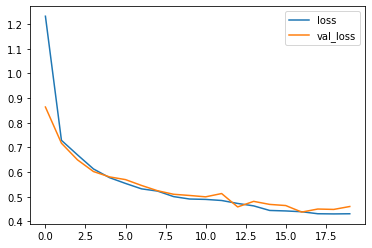

In [33]:

metrics[['loss','val_loss']].plot()


<AxesSubplot:>

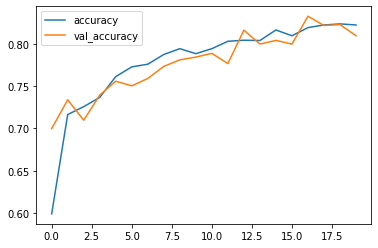

In [34]:

metrics[['accuracy','val_accuracy']].plot()


In [35]:

predictions = np.argmax(Resnet_model.predict(test_image_gen), axis=1)


2/2 [==============================] - 21s 7s/step


In [36]:

print(classification_report(test_image_gen.classes,predictions))

print(confusion_matrix(test_image_gen.classes,predictions))


              precision    recall  f1-score   support

           0       0.84      0.98      0.91       639
           1       0.71      0.49      0.58       223
           2       0.73      0.16      0.26        51

    accuracy                           0.82       913
   macro avg       0.76      0.54      0.58       913
weighted avg       0.80      0.82      0.79       913

[[629  10   0]
 [111 109   3]
 [  9  34   8]]


In [37]:

Resnet_model.save('Resnet.h5')


EfficientNetB5 model


In [38]:
"""
base_model=tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, 
                                                             weights="imagenet",
                                                             input_shape=image_shape+[3],
                                                             pooling='max')
for layer in base_model.layers:
    layer.trainable = False

B5_model=Sequential()
B5_model.add(base_model)
B5_model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 ))
B5_model.add(Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu'))
B5_model.add(Dropout(rate=.4, seed=123))
B5_model.add(Dense(len(classes), activation='softmax'))
"""

'\nbase_model=tf.keras.applications.efficientnet.EfficientNetB5(include_top=False, \n                                                             weights="imagenet",\n                                                             input_shape=image_shape+[3],\n                                                             pooling=\'max\')\nfor layer in base_model.layers:\n    layer.trainable = False\n\nB5_model=Sequential()\nB5_model.add(base_model)\nB5_model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 ))\nB5_model.add(Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),\n                bias_regularizer=regularizers.l1(0.006) ,activation=\'relu\'))\nB5_model.add(Dropout(rate=.4, seed=123))\nB5_model.add(Dense(len(classes), activation=\'softmax\'))\n'

In [39]:
"""
base_model.summary()
"""

'\nbase_model.summary()\n'

In [40]:
"""
B5_model.summary()
"""

'\nB5_model.summary()\n'

In [41]:
"""
B5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
"""

"\nB5_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])\nlearning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)\n#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)\nearly_stopping = EarlyStopping(monitor='val_loss', patience=10)\n"

In [42]:
"""
history = B5_model.fit(train_image_gen,
                 validation_data=test_image_gen,
                 epochs=20,
#                class_weight=class_weights,
                 callbacks=[learning_rate_reduction],
                 verbose=1)
                 """

'\nhistory = B5_model.fit(train_image_gen,\n                 validation_data=test_image_gen,\n                 epochs=20,\n#                class_weight=class_weights,\n                 callbacks=[learning_rate_reduction],\n                 verbose=1)\n                 '

In [43]:
"""
metrics = pd.DataFrame(B5_model.history.history)
"""

'\nmetrics = pd.DataFrame(B5_model.history.history)\n'

In [44]:
"""
metrics[['loss','val_loss']].plot()
"""

"\nmetrics[['loss','val_loss']].plot()\n"

In [45]:
"""
metrics[['accuracy','val_accuracy']].plot()
"""

"\nmetrics[['accuracy','val_accuracy']].plot()\n"

In [46]:
"""
predictions = np.argmax(B5_model.predict(test_image_gen), axis=1)
"""

'\npredictions = np.argmax(B5_model.predict(test_image_gen), axis=1)\n'

In [47]:
"""
print(classification_report(test_image_gen.classes,predictions))

print(confusion_matrix(test_image_gen.classes,predictions))
"""

'\nprint(classification_report(test_image_gen.classes,predictions))\n\nprint(confusion_matrix(test_image_gen.classes,predictions))\n'

In [48]:
#B5_model.save('EficientNet.h5')